In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
fifa=pd.read_csv("Out_data\modeling_data.csv", index_col=0)

In [4]:
fifa.head()

,Age,Overall,Potential,Value,Special,International Reputation,Weak Foot,Skill Moves,Body Type,Height,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Right_Foot,WorkRate1,WorkRate2,Major_Nation,Simple_Position
0,31,94,94,110500000.0,2202,5.0,4.0,4.0,0,5.583333,...,6.0,11.0,15.0,14.0,8.0,0,0,0,1,0
1,33,94,94,77000000.0,2228,5.0,4.0,5.0,1,6.166667,...,7.0,11.0,15.0,14.0,11.0,1,1,2,1,0
2,26,92,93,118500000.0,2143,5.0,5.0,5.0,0,5.750000,...,9.0,9.0,15.0,15.0,11.0,1,1,0,1,1
3,27,91,93,72000000.0,1471,4.0,3.0,1.0,0,6.333333,...,90.0,85.0,87.0,88.0,94.0,1,0,0,1,2
4,27,91,92,102000000.0,2281,4.0,5.0,4.0,1,5.916667,...,15.0,13.0,5.0,10.0,13.0,1,1,1,1,3


In [5]:
X = fifa[['Age','Overall', 'Potential','Special','International Reputation', 'Weak Foot', 
          'Skill Moves', 'Height', 'Weight','Crossing', 'Finishing', 'HeadingAccuracy', 
          'ShortPassing', 'Volleys','Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 
          'BallControl','Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
          'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
          'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
          'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
          'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
          'Major_Nation', 'Right_Foot']]
y = np.log1p(fifa['Value'])

In [12]:

from sklearn.preprocessing import MinMaxScaler

Xp=MinMaxScaler().fit_transform(X)

In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
#using lesso linear model becaud it is more good when we have a lot of non  zero values
select=SelectFromModel(Lasso(alpha=0.0001,random_state=35))
select.fit(Xp,y)

SelectFromModel(estimator=Lasso(alpha=0.0001, random_state=35))

In [20]:
select.get_support()

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True])

In [23]:
sf=X.columns[(select.get_support())]
sf

Index(['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Major_Nation',
       'Right_Foot'],
      dtype='object')

In [31]:
print("totle columns in X :" + str(X.shape[1]))
print("totle columns in sf :" + str(len(sf)))
print("totle columns in X :" + str(X.shape[1]-len(sf)))

totle columns in X :45
totle columns in sf :42
totle columns in X :3


In [34]:
X=X[sf]
X.shape

(18207, 42)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(14565, 42) (3642, 42) (14565,) (3642,)


In [43]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    r2 = r2_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}, r2 = {:,.2f}'.format(rmse, evs, r2))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

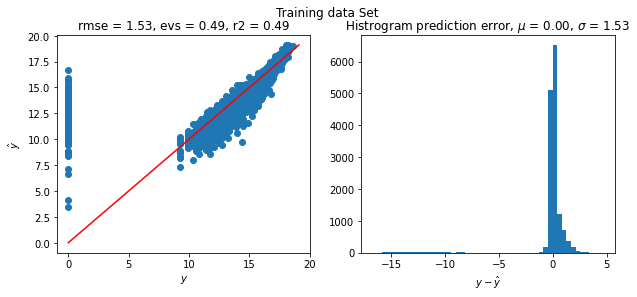

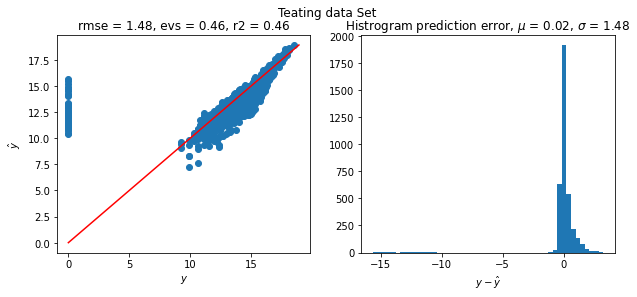

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# usning pipelining on the linear rgression model
model = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("lin_reg", Lasso(alpha=0.01))
    ))

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Training data Set')

y_test_pred = model.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Testing data Set')